In [1]:
# -*- coding: utf-8 -*-

import netCDF4 as nc4
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
""" ********  FILES TO PLOT  *************
    *****************************************
"""

dirt = "/gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/AM98/"
dirm = "/gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/AM98/MESHMASK_v081121/"
dirm2 = "/gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/AM98/MESHMASK_v291221/"

ListA = [[4  , 0. , dirt+"EXP_ref4_ns0/AM98_ref4_ns0_40y_1m_00010101_00401230_grid_T.nc",
                   dirm+"mesh_mask_n4_t0.nc", 128], 
         [16 , 0. ,dirt+"EXP_ref16_ns0/AM98_ref_16_ns_0_40y_1m_00010101_00401230_grid_T.nc",
                   dirm+"mesh_mask_n16_t0.nc", 128] ] 

Listdt = [ListA]

ListB = [[4  , 45. , dirt+"EXP_ref4_ns45/AM98_ref4_ns45_40y_1m_00010101_00401230_grid_T.nc",
                    dirm+"mesh_mask_n4_t45.nc", 128], 
         [16 , 45. ,dirt+"EXP_ref16_ns45/AM98_ref16_ns45_40y_1m_00010101_00401230_grid_T.nc",
                    dirm+"mesh_mask_n16_t45.nc", 128] ] 

ListC = [[4  , 5. , dirt+"EXP_ref4_ns5/AM98_ref4_ns5_1m_00010101_00401230_grid_T.nc",
                    dirm2+"mesh_mask_n4_t5.nc", 128], 
         [16 , 5. ,dirt+"EXP_ref16_ns5/AM98_ref16_ns5_1m_00010101_00401230_grid_T.nc",
                    dirm2+"mesh_mask_n16_t5.nc", 128] ] 
ListD = [[4  , 30. , dirt+"EXP_ref4_ns30/AM98_ref4_ns30_1m_00010101_00401230_grid_T.nc",
                    dirm2+"mesh_mask_n4_t30.nc", 128], 
         [16 , 30. ,dirt+"EXP_ref16_ns30/AM98_ref16_ns30_1m_00010101_00401230_grid_T.nc",
                    dirm2+"mesh_mask_n16_t30.nc", 128] ] 


Listdt = [ListA, ListC, ListD, ListB]

""" *************************** PARAMETERS
"""

NI = 2 ; NJ = 4
L=2000E3 # 2000 km
vmin = 200 ; vmax = 800

tickszer = [np.float64(i)*L/4. for i in range(5)]
cticks = np.arange(vmin, vmax+20., 5*20.)
# palette = plt.get_cmap('RdYlBu_r')
palette = plt.get_cmap('RdBu_r', 30)

save = 0 ; psave = "figureCA.png" ; dpi = 200


... dataframe[0,0], n = 4
... dataframe[0,1], n = 4
... dataframe[0,2], n = 4
... dataframe[0,3], n = 4
... dataframe[1,0], n = 16
... dataframe[1,1], n = 16


IndexError: Inconsistent shape between the condition and the input (got (360, 360) and (100, 100))

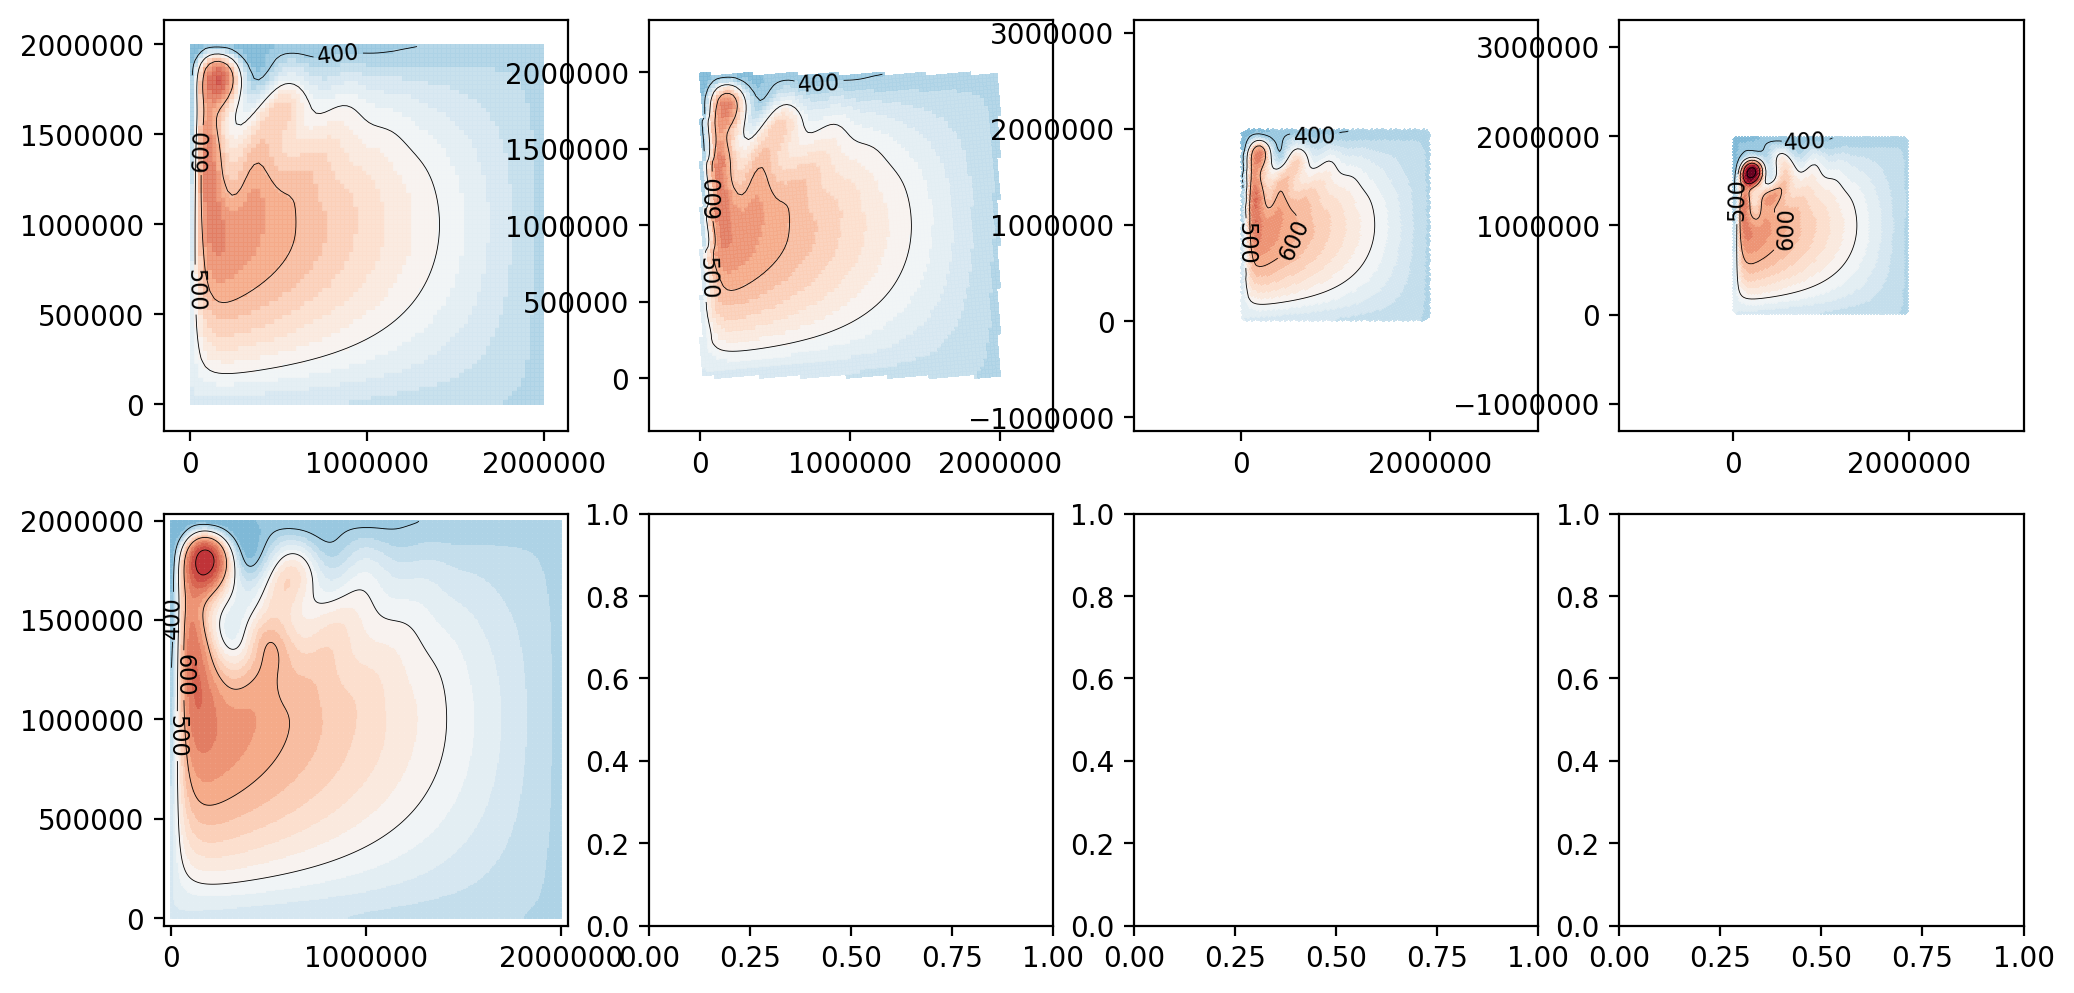

In [3]:
fig, ax = plt.subplots(NI,NJ, figsize=(NJ*3,NI*3), dpi = dpi, squeeze=False)

""" *************************** DATA
"""
for i in range(NI):
    for j in range(NJ):
        n,theta,pdtT,pmm, nmean = Listdt[j][i]
        dx = 100E3/np.float64(n)
        # reading
        print("... dataframe[%d,%d], n = %d" % (i,j,n))
        dt = nc4.Dataset(pdtT)
        mm = nc4.Dataset(pmm)
        tmask = mm.variables['tmask'][0,0]
        glamt = mm.variables['glamt'][0] ; gphit = mm.variables['gphit'][0]
        # grid
        lx = dx*np.cos((45+theta)*np.pi/180)/np.sqrt(2) ; ly = dx*np.sin((45+theta)*np.pi/180)/np.sqrt(2)
        nx,ny = np.shape(glamt)
        gridx = np.zeros((nx,ny)) ; gridy = np.zeros((nx,ny))
        gridx = glamt - lx ; gridy = gphit - ly
        # data
        if nmean>0:
            ssh = dt.variables['sossheig'][-nmean:,:,:] +500.
            data = np.mean(ssh[:,:,:], axis=0)
            data = np.ma.masked_where(tmask==0,data)
        else :
            ssh = dt.variables['sossheig'][-1,:,:] +500.
            data = np.ma.masked_where(tmask==0,ssh)
        # plot
        cf = ax[i][j].pcolormesh(gridx, gridy, data,
                            vmin=vmin, vmax=vmax, alpha = 0.9,
                            # levels = levels,
                            cmap = palette)
        # ax[i][j].title.set_text(titles[i][j])
        # contour
        c1= ax[i][j].contour(glamt,gphit, data,
                        levels = cticks,
                        vmin=vmin,vmax=vmax,
                        linewidths =0.3, colors=('k',),linestyles = "solid")
        ax[i][j].clabel(c1, fmt='%3.0f', colors='k', fontsize=8)
        
        
""" *************************** PRETTY
"""
for i in range(NI):
    for j in range(NJ):
        n,t,pdtT,pmm, _ = Listdt[j][i]
        dx = 100E3/np.float64(n)
        limx = dx/2 ; limy = dx/2
        # print(tickszer)
        ax[i][j].set_xlim(-limx,L + limx)
        ax[i][j].set_xticks(tickszer)
        ax[i][j].set_ylim(-limy,L + limy)
        ax[i][j].set_yticks(tickszer)
        ax[i][j].set_xticklabels([]) ; ax[i][j].set_yticklabels([])
        #
        if (i==NI-1):
            ax[i][j].set_xticklabels(["%d" % (x/1E3) for x in tickszer])
            ax[i][j].set_xlabel("X (km)")
        #
        if (j==0):
            ax[i][j].set_yticklabels(["%d" % (x/1E3) for x in tickszer])
            ax[i][j].set_ylabel("Y (km)")
        #
        ax[i][j].patch.set_color('0.')
        ax[i][j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i][j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i][j].tick_params(axis = "y", which = 'both', width=1.5, labelsize = 10, pad = 5, left = True, right = True)
        ax[i][j].tick_params(axis = 'x', which = 'both', width=1.5, labelsize = 10, pad = 10, bottom = True, top = True)
        ax[i][j].tick_params(which='minor',length = 4)
        ax[i][j].tick_params(which='major',length = 6)
        ax[i][j].set_aspect(aspect='equal') # data coordinate 'equal'


fig.subplots_adjust(hspace = 0., wspace = 0.2, right=0.85)

""" *************************** COLORBAR
"""

for i in range(NI):
    pos= ax[i][-1].get_position()
    cax = fig.add_axes([pos.x1+0.03, pos.y0, 0.015, pos.y1-pos.y0])
    cbar = fig.colorbar(cf, cax=cax,
                        orientation = "vertical", extend = 'both')
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(["%dm" % s for s in cticks])
    # cbar.set_label(r"Upper Layer Width - (m)")

""" *************************** SAVING
"""

if save :
    print("\nsaving : %s" % psave)
    fig.savefig(psave, dpi = dpi)
    plt.close()
    print("figure closed")
else:
    plt.show()

In [5]:
print(data.shape)
print(tmask.shape)

(100, 100)
(360, 360)


In [7]:
print(pdtT)

/gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/AM98/EXP_ref16_ns5/AM98_ref16_ns5_1m_00010101_00401230_grid_T.nc
